<a href="https://colab.research.google.com/github/ranjith13119/flight-rate---Prediction---regression/blob/main/Flight_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
# import os
# os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"
# %cd /content/drive/MyDrive/Flight-Price-Prediction
# !kaggle datasets download -d nikhilmittal/flight-fare-prediction-mh
# #unzipping the zip files and deleting the zip files
# !unzip \*.zip  && rm *.zipy

In [60]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers
import scipy.stats as stat
import pylab

In [61]:
train_dataset = pd.read_excel("/content/drive/MyDrive/Flight-Price-Prediction/Data_Train.xlsx")
test_dataset = pd.read_excel("/content/drive/MyDrive/Flight-Price-Prediction/Test_set.xlsx")

In [62]:
train_dataset.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [63]:
train_dataset.shape

(10683, 11)

In [64]:
train_dataset.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [65]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [66]:
train_dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [67]:
test_dataset.shape

(2671, 10)

In [68]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [69]:
test_dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

# **Data Preprocessing**

In [70]:
dataset = train_dataset.append(test_dataset,sort=False)

In [71]:
dataset.shape

(13354, 11)

In [72]:
dataset.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [73]:
dataset.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [74]:
dataset[dataset['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0


In [75]:
data =  dataset[dataset.Airline == "Air India"]

In [76]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [77]:
data.Airline.value_counts()

Air India    2192
Name: Airline, dtype: int64

In [78]:
filter1 = data.Source == "Delhi"
filter2 = data.Destination == "Cochin"
data1 = data[filter1 & filter2]

In [79]:
import datetime 
day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
data1["day"] = data1.Date_of_Journey.apply(lambda x : day_name[datetime.datetime.strptime(x, '%d/%m/%Y').weekday()])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [80]:
data1[data1['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0,Monday


In [81]:
data1 = data1[data1.day == "Monday"]

In [82]:
data1  = data1[data1.Dep_Time.str.startswith("09:45")]

In [83]:
data1[data1.Duration == "23h 40m"].Route.mode()

0    DEL → MAA → COK
dtype: object

In [84]:
data1[data1.Duration == "23h 40m"].Total_Stops.mode()

0    1 stop
dtype: object

In [85]:
dataset['Route'].fillna('DEL → MAA → COK', inplace=True)
dataset['Total_Stops'].fillna('1 stop', inplace=True)

In [86]:
dataset.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
dtype: int64

In [87]:
dataset['Date']=dataset['Date_of_Journey'].str.split('/').str[0]
dataset['Month']=dataset['Date_of_Journey'].str.split('/').str[1]
dataset['Year']=dataset['Date_of_Journey'].str.split('/').str[2]

In [88]:
def change_datatype(df, feature):
  df[feature] = df[feature].astype(int)

In [89]:
for feat in ['Date', 'Month', 'Year']:
  change_datatype(dataset, feat)

In [90]:
dataset['Date'].dtypes

dtype('int64')

In [91]:
import datetime 
day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
dataset["day"] = dataset.Date_of_Journey.apply(lambda x : day_name[datetime.datetime.strptime(x, '%d/%m/%Y').weekday()])

In [92]:
# dataset.drop(['Date_of_Journey'], axis = 1, inplace = True)

In [93]:
dataset.Airline.value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [94]:
dataset["Total_Stops"].value_counts()

1 stop      7057
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [95]:
dataset["Total_Stops"].replace("non-stop", "0 stop", inplace = True)

In [96]:
dataset["Total_Stops"].value_counts()

1 stop     7057
0 stop     4340
2 stops    1899
3 stops      56
4 stops       2
Name: Total_Stops, dtype: int64

In [97]:
dataset["Stop"] = dataset["Total_Stops"].str.split(" ").str[0]

In [98]:
dataset["Stop"].value_counts()

1    7057
0    4340
2    1899
3      56
4       2
Name: Stop, dtype: int64

In [99]:
# dataset.drop(['Total_Stops'], axis = 1, inplace = True)

In [100]:
dataset.Additional_Info.value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
2 Long layover                      1
Red-eye flight                      1
1 Short layover                     1
Name: Additional_Info, dtype: int64

In [101]:
dataset['Route_1']=dataset['Route'].str.split('→ ').str[0]
dataset['Route_2']=dataset['Route'].str.split('→ ').str[1]
dataset['Route_3']=dataset['Route'].str.split('→ ').str[2]
dataset['Route_4']=dataset['Route'].str.split('→ ').str[3]
dataset['Route_5']=dataset['Route'].str.split('→ ').str[4]

In [102]:
#dataset.drop(['Route'], axis = 1, inplace = True)

In [103]:
dataset['Arrival_Time']=dataset['Arrival_Time'].str.split(' ').str[0]
dataset['Dep_Time']=dataset['Dep_Time'].str.split(' ').str[0]

In [104]:
dataset['Arrival_Time'].head(1)

0    01:10
Name: Arrival_Time, dtype: object

In [105]:
dataset['Arrival_hour'] = dataset['Arrival_Time'].str.split(':').str[0]
dataset['Arrival_min'] = dataset['Arrival_Time'].str.split(':').str[1]
dataset['Dep_hour'] = dataset['Dep_Time'].str.split(':').str[0]
dataset['Dep_min'] = dataset['Dep_Time'].str.split(':').str[1]
# dataset['Duration_Hour'] = dataset['Duration'] .str.split(':').str[0]
# dataset['Duration_Minute'] = dataset['Duration'] .str.split(':').str[1]
dataset['Duration_mins']  =  dataset['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [106]:
for feat in ['Arrival_hour', 'Arrival_min','Stop', 'Dep_hour', 'Dep_min', "Duration_mins"]:
  change_datatype(dataset, feat)

In [107]:
dataset['Duration_mins'].dtypes

dtype('int64')

In [108]:
def pod(x):
    if (x > 3) and (x <= 6):
        return 'Early Morning'
    elif (x > 6) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Evening'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 3):
        return'Late Night'

In [109]:
dataset['Dep_Part_of_day'] = dataset['Dep_hour'].apply(pod)
dataset['Arrival_Part_of_day'] = dataset['Arrival_hour'].apply(pod)

In [110]:
dataset.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Date', 'Month', 'Year', 'day', 'Stop',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5', 'Arrival_hour',
       'Arrival_min', 'Dep_hour', 'Dep_min', 'Duration_mins',
       'Dep_Part_of_day', 'Arrival_Part_of_day'],
      dtype='object')

# **Data Visualization**

Jet Airways Business class is Having Higher Price than any other Airline

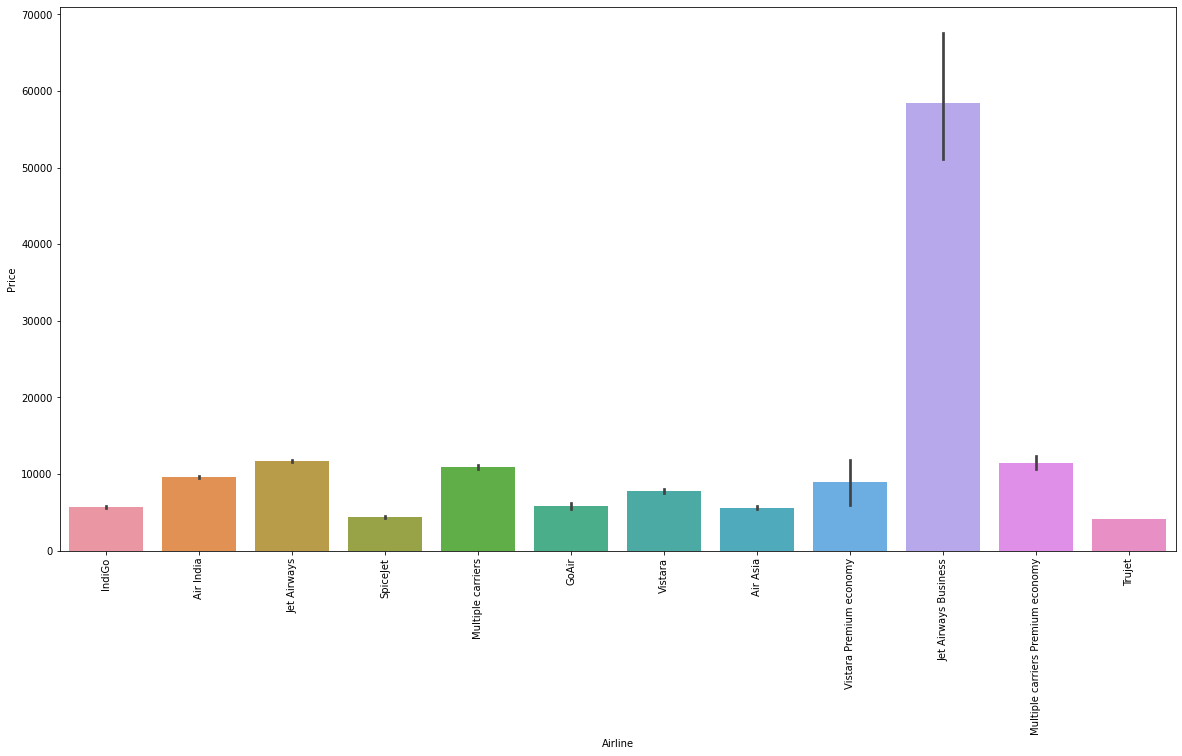

In [111]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.barplot(x = dataset.Airline, y = dataset.Price)
plt.xticks(rotation=90)
plt.show()

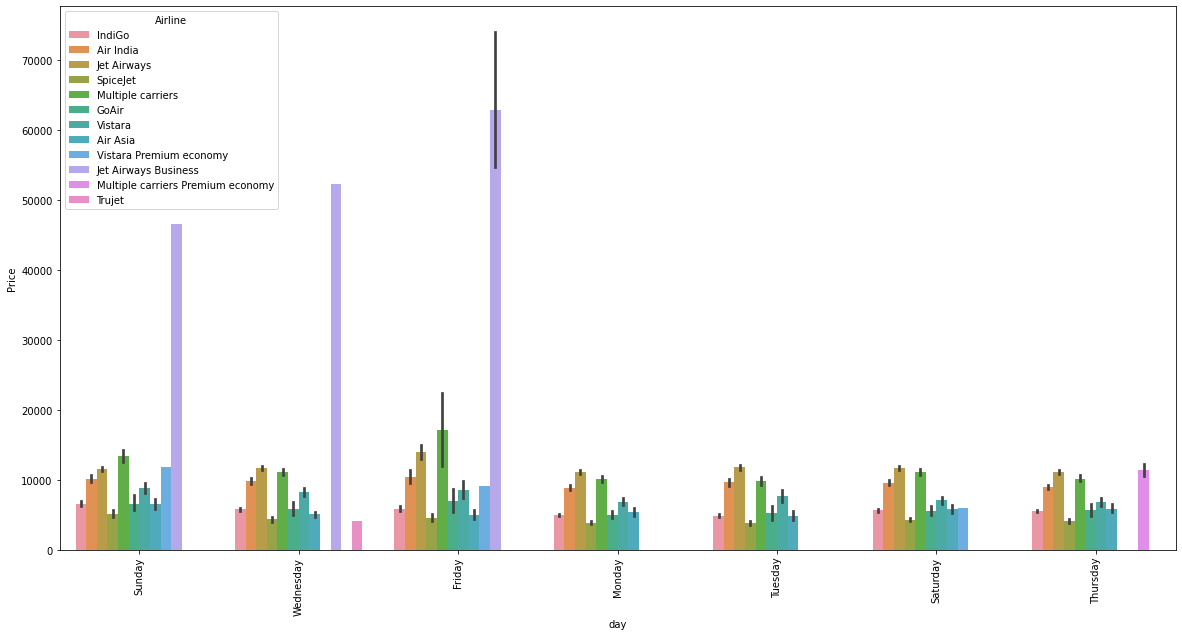

In [112]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.barplot(x = dataset.day, y = dataset.Price, hue=dataset.Airline)
plt.xticks(rotation=90)
plt.show()

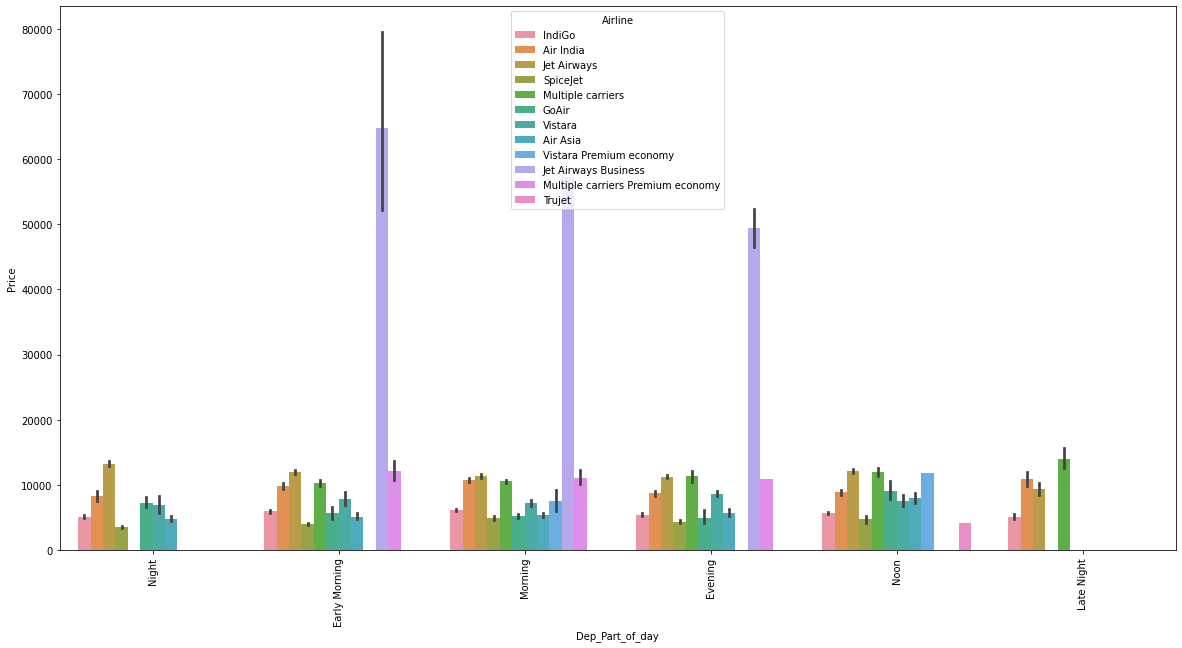

In [113]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.barplot(x = dataset.Dep_Part_of_day, y = dataset.Price, hue=dataset.Airline)
plt.xticks(rotation=90)
plt.show()

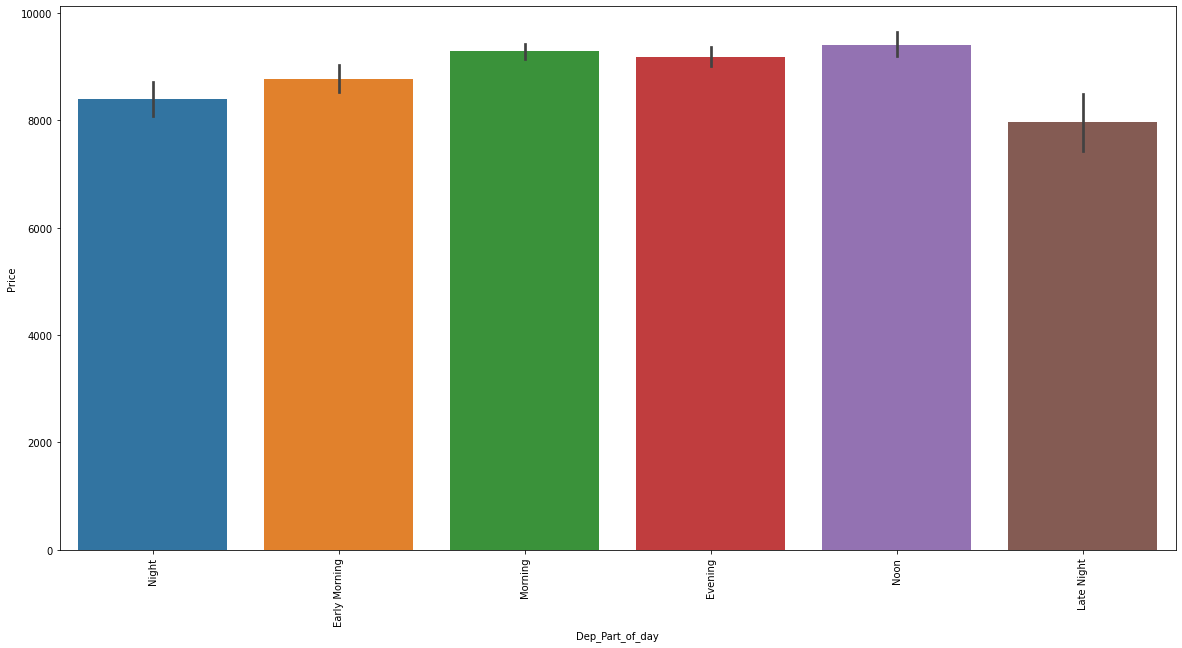

In [114]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.barplot(x = dataset.Dep_Part_of_day, y = dataset.Price)
plt.xticks(rotation=90)
plt.show()

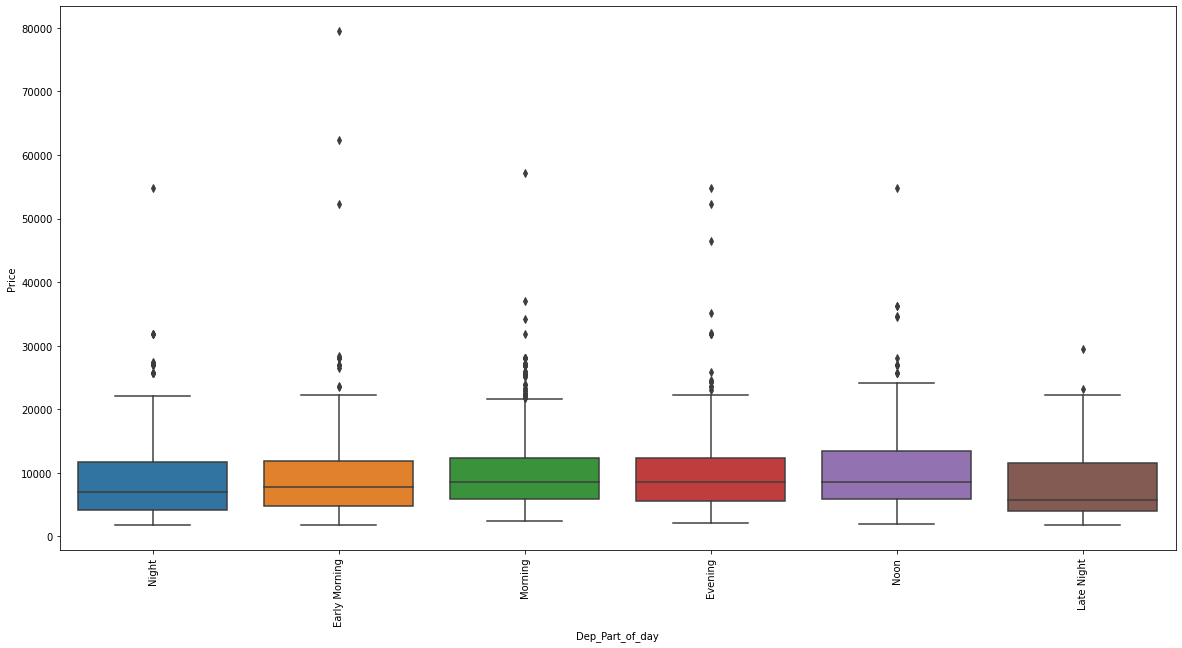

In [115]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.boxplot(x = dataset.Dep_Part_of_day, y = dataset.Price)
plt.xticks(rotation=90)
plt.show()

In [116]:
# import dtale
# import dtale.app as dtale_app
# dtale_app.USE_COLAB = True

In [117]:
# dtale.show(dataset)

In [118]:
# # DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

# import pandas as pd
# df = dataset
# if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
# 	df = df.to_frame(index=False)

# # remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
# df = df.reset_index().drop('index', axis=1, errors='ignore')
# df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

# chart_data = pd.concat([
# 	df['day'],
# 	df['Price'],
# 	df['Airline'],
# ], axis=1)
# chart_data = chart_data.query("""(`Airline` == 'Air Asia') or (`Airline` == 'Air India') or (`Airline` == 'GoAir') or (`Airline` == 'IndiGo') or (`Airline` == 'Jet Airways') or (`Airline` == 'Jet Airways Business') or (`Airline` == 'Multiple carriers') or (`Airline` == 'Multiple carriers Premium economy') or (`Airline` == 'SpiceJet') or (`Airline` == 'Trujet') or (`Airline` == 'Vistara') or (`Airline` == 'Vistara Premium economy')""")
# chart_data = chart_data.sort_values(['Airline', 'day'])
# chart_data = chart_data.rename(columns={'day': 'x'})
# chart_data = chart_data.dropna()
# # WARNING: This is not taking into account grouping of any kind, please apply filter associated with
# #          the group in question in order to replicate chart. For this we're using '"""`Airline` == 'Air Asia'"""'
# chart_data = chart_data.query("""`Airline` == 'Air Asia'""")

# import plotly.graph_objs as go

# charts = []
# charts.append(go.Bar(
# 	x=chart_data['x'],
# 	y=chart_data['Price'],
# 	name='(Airline: Air Asia)'
# ))
# figure = go.Figure(data=charts, layout=go.Layout({
#     'barmode': 'group',
#     'legend': {'orientation': 'h'},
#     'title': {'text': '(Airline: Air Asia) - Price by day'},
#     'xaxis': {'title': {'text': 'day'}},
#     'yaxis': {'title': {'text': 'Price'}, 'type': 'linear'}
# }))

# # If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:
# #
# from plotly.offline import iplot, init_notebook_mode

# init_notebook_mode(connected=True)
# for chart in charts:
#     chart.pop('id', None) # for some reason iplot does not like 'id'
# iplot(figure)

In [119]:
dataset.isnull().sum()

Airline                    0
Date_of_Journey            0
Source                     0
Destination                0
Route                      0
Dep_Time                   0
Arrival_Time               0
Duration                   0
Total_Stops                0
Additional_Info            0
Price                   2671
Date                       0
Month                      0
Year                       0
day                        0
Stop                       0
Route_1                    0
Route_2                    0
Route_3                 4340
Route_4                11397
Route_5                13296
Arrival_hour               0
Arrival_min                0
Dep_hour                   0
Dep_min                    0
Duration_mins              0
Dep_Part_of_day            0
Arrival_Part_of_day        0
dtype: int64

In [120]:
dataset["Route_3"].fillna("None", inplace = True)
dataset["Route_4"].fillna("None", inplace = True)
dataset["Route_5"].fillna("None", inplace = True)

In [121]:
data = dataset.copy()

In [122]:
data.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Route', 'Duration', 'Total_Stops', 'Additional_Info'], axis = 1 , inplace = True)

In [123]:
data.shape

(13354, 21)

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline              13354 non-null  object 
 1   Source               13354 non-null  object 
 2   Destination          13354 non-null  object 
 3   Price                10683 non-null  float64
 4   Date                 13354 non-null  int64  
 5   Month                13354 non-null  int64  
 6   Year                 13354 non-null  int64  
 7   day                  13354 non-null  object 
 8   Stop                 13354 non-null  int64  
 9   Route_1              13354 non-null  object 
 10  Route_2              13354 non-null  object 
 11  Route_3              13354 non-null  object 
 12  Route_4              13354 non-null  object 
 13  Route_5              13354 non-null  object 
 14  Arrival_hour         13354 non-null  int64  
 15  Arrival_min          13354 non-null  

In [125]:
categorical_feature = data.select_dtypes("object")
numerical_feature = data.select_dtypes("int64")

In [126]:
data.day.value_counts()

Wednesday    2621
Monday       2307
Thursday     2283
Saturday     2097
Sunday       1849
Friday       1121
Tuesday      1076
Name: day, dtype: int64

# **Feature Engineering**

In [127]:
weights = {
    'Monday' : 1,
    'Tuesday' : 2, 
    'Wednesday' : 3,
    'Thursday' : 4,
    'Friday' : 5,
    'Saturday' : 6,
    'Sunday' : 7
}

data['day'] = data['day'].map(weights)

In [128]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data["Airline"]=encoder.fit_transform(data['Airline'])
data["Source"]=encoder.fit_transform(data['Source'])
data["Destination"]=encoder.fit_transform(data['Destination'])
data["Route_1"]=encoder.fit_transform(data['Route_1'])
data["Route_2"]=encoder.fit_transform(data['Route_2'])
data["Route_3"]=encoder.fit_transform(data['Route_3'])
data["Route_4"]=encoder.fit_transform(data['Route_4'])
data["Route_5"]=encoder.fit_transform(data['Route_5'])
data["Dep_Part_of_day"]=encoder.fit_transform(data['Dep_Part_of_day'])
data["Arrival_Part_of_day"]=encoder.fit_transform(data['Arrival_Part_of_day'])

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline              13354 non-null  int64  
 1   Source               13354 non-null  int64  
 2   Destination          13354 non-null  int64  
 3   Price                10683 non-null  float64
 4   Date                 13354 non-null  int64  
 5   Month                13354 non-null  int64  
 6   Year                 13354 non-null  int64  
 7   day                  13354 non-null  int64  
 8   Stop                 13354 non-null  int64  
 9   Route_1              13354 non-null  int64  
 10  Route_2              13354 non-null  int64  
 11  Route_3              13354 non-null  int64  
 12  Route_4              13354 non-null  int64  
 13  Route_5              13354 non-null  int64  
 14  Arrival_hour         13354 non-null  int64  
 15  Arrival_min          13354 non-null  

In [130]:
data_train=data[0:10683]
data_test=data[10683:]

# **Train & Test set Split**

In [131]:
X = data_train.drop(['Price'], axis = 1)
y = data_train['Price']

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [133]:
X_train.shape

(8012, 20)

# **Feature Selection**

In [134]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(X_train,y_train)

In [135]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X_train.columns)

In [136]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,Airline,1.051974e+04
1,Source,5.554467e+03
2,Destination,1.165279e+04
3,Date,1.741730e+04
4,Month,1.828831e+03
5,Year,5.075136e-26
6,day,3.039154e+03
7,Stop,4.346408e+03
8,Route_1,5.694196e+03
9,Route_2,3.894687e+04


In [137]:
features_rank.nlargest(20,'Score') 

,Features,Score
17,Duration_mins,2.526226e+06
10,Route_3,5.553727e+04
16,Dep_min,5.304306e+04
14,Arrival_min,3.941095e+04
9,Route_2,3.894687e+04
3,Date,1.741730e+04
13,Arrival_hour,1.427676e+04
2,Destination,1.165279e+04
0,Airline,1.051974e+04
15,Dep_hour,8.577665e+03


In [138]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [139]:
feature_corr = correlation(X_train, 0.85)

No much correlation between the feature

In [140]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [141]:
model=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [142]:
model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [143]:
selected_features=X_train.columns[(model.get_support())]

In [144]:
X_train.columns

Index(['Airline', 'Source', 'Destination', 'Date', 'Month', 'Year', 'day',
       'Stop', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5',
       'Arrival_hour', 'Arrival_min', 'Dep_hour', 'Dep_min', 'Duration_mins',
       'Dep_Part_of_day', 'Arrival_Part_of_day'],
      dtype='object')

In [145]:
selected_features

Index(['Airline', 'Source', 'Destination', 'Date', 'Month', 'day', 'Stop',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5', 'Arrival_hour',
       'Arrival_min', 'Dep_hour', 'Dep_min', 'Duration_mins',
       'Dep_Part_of_day', 'Arrival_Part_of_day'],
      dtype='object')

In [190]:
X_train=X_train.drop(['Year', 'Dep_Part_of_day', 'Arrival_Part_of_day'],axis=1)
X_test=X_test.drop(['Year', 'Dep_Part_of_day', 'Arrival_Part_of_day'],axis=1)

# **Feature Scaling**

In [191]:
def plot_feature_distribution(df, feature):
  plt.figure(figsize=(15,3))
  plt.subplot(1,3,1)
  df[feature].hist()
  plt.subplot(1,3,2)
  sns.boxplot(df[feature])
  plt.subplot(1,3,3)
  stat.probplot(df[feature],dist='norm',plot=pylab)
  plt.show()

Airline


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


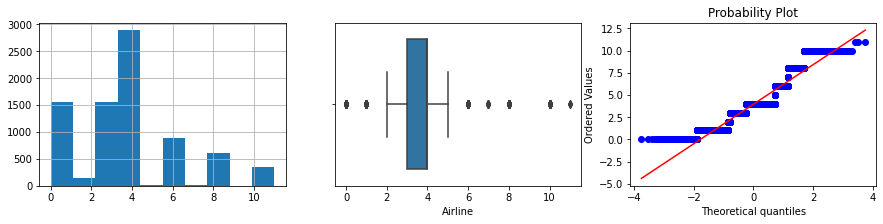

Source


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


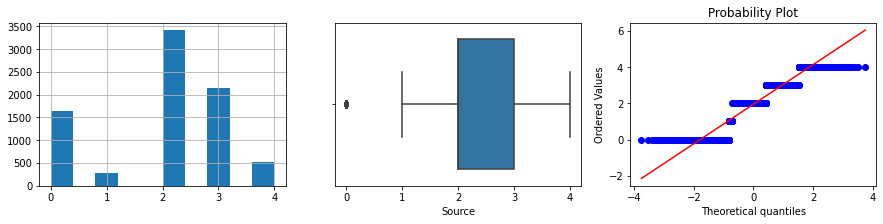

Destination


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


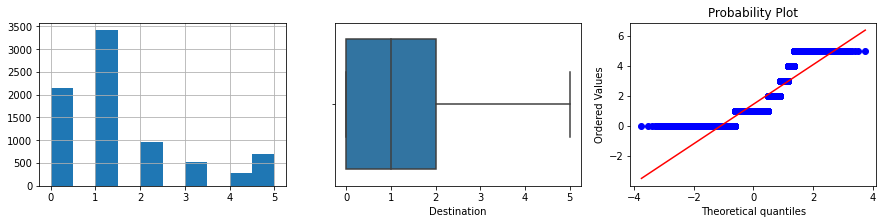

Date


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


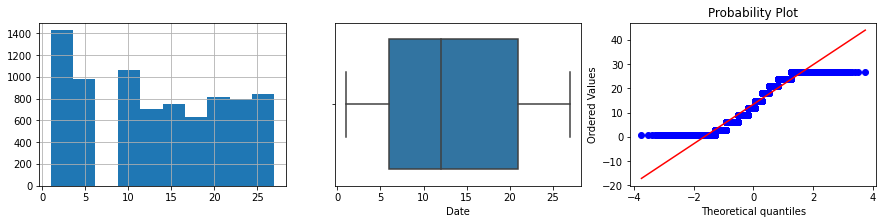

Month


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


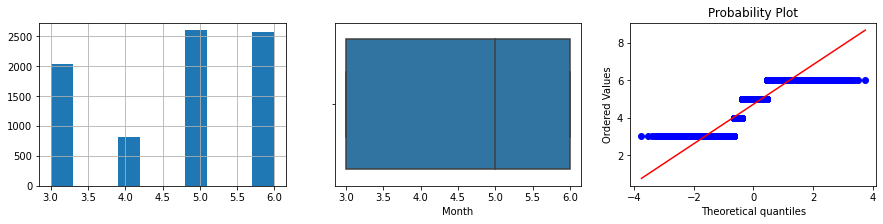

day


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


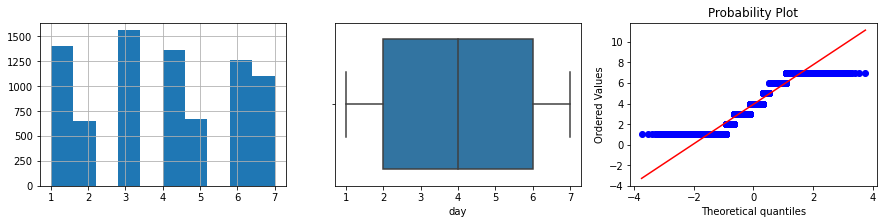

Stop


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


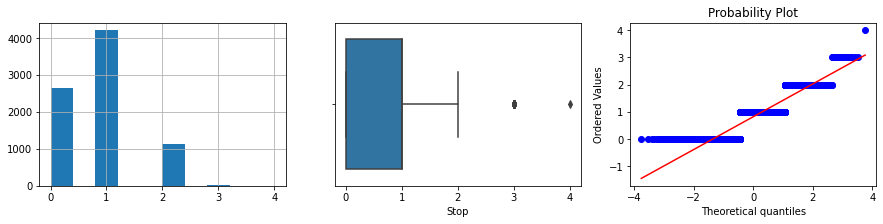

Route_1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


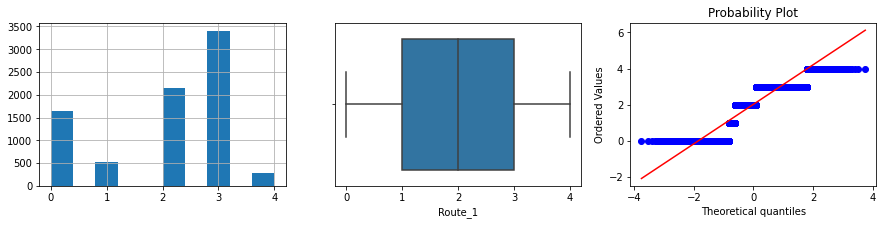

Route_2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


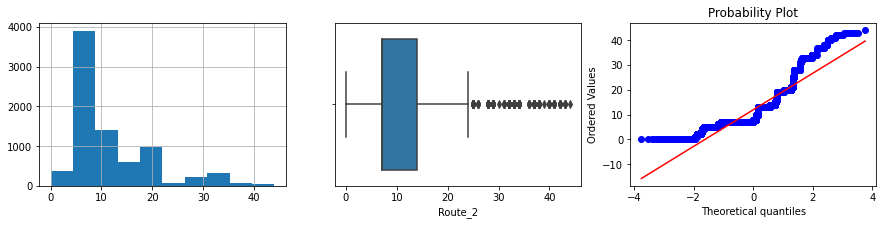

Route_3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


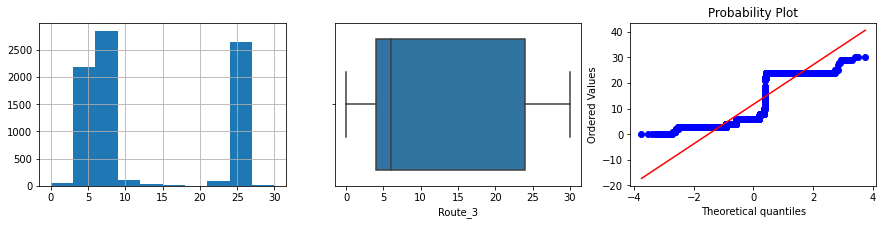

Route_4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


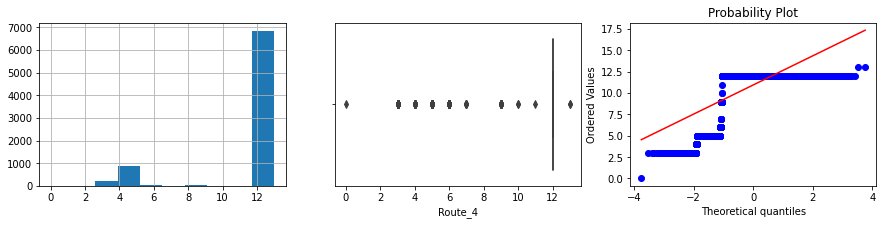

Route_5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


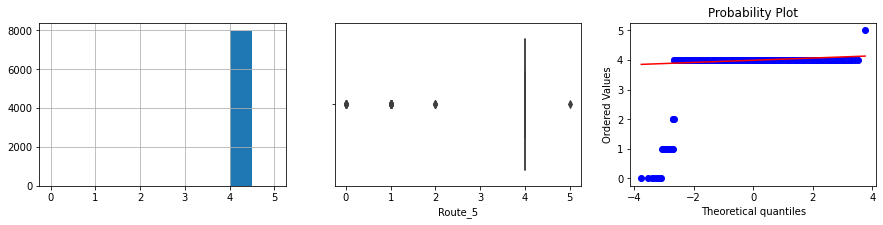

Arrival_hour


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


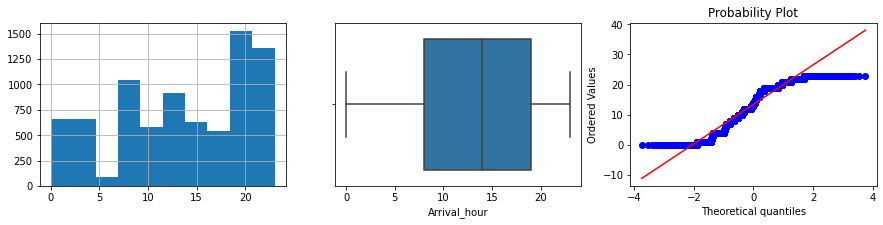

Arrival_min


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


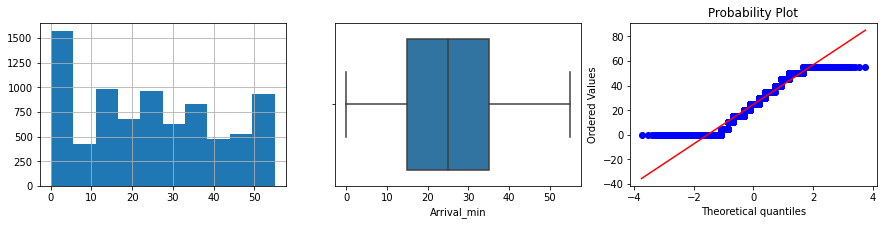

Dep_hour


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


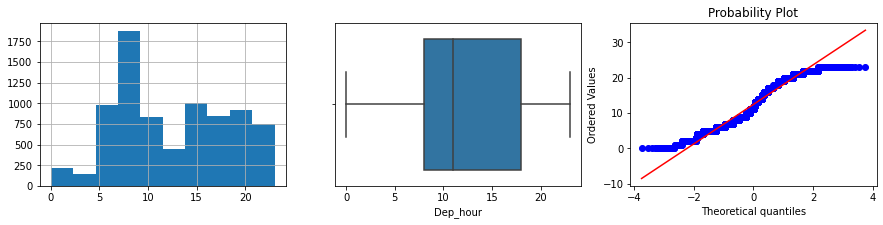

Dep_min


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


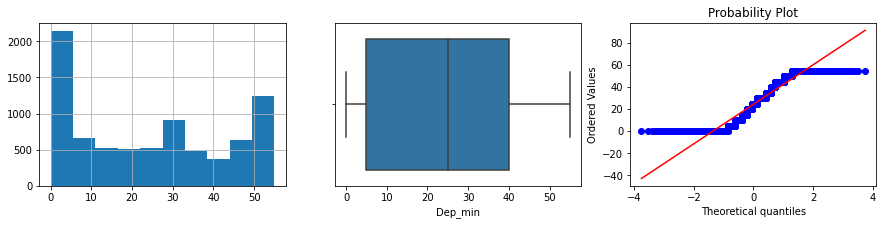

Duration_mins


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


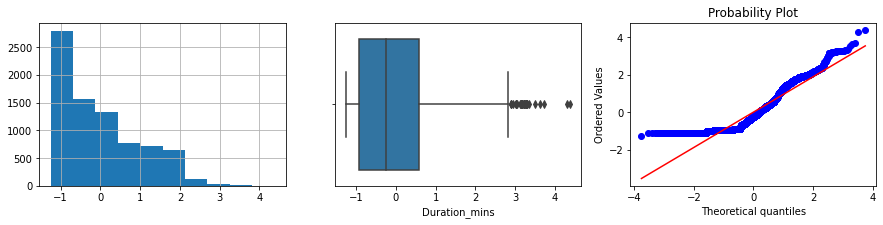

In [192]:
for feature in X_train.columns:
  print(feature)
  plot_feature_distribution(X_train, feature)

In [195]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale_cols = ["Duration_mins" , "day" , "Month" , "Dep_hour" , "Dep_min" , "Arrival_hour" , "Arrival_min"]

X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

# **Model Implementation**

In [196]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [197]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [198]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [199]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train,y_train)

In [155]:
y_pred=rf_random.predict(X_test)

In [156]:
X_train.columns

Index(['Airline', 'Source', 'Destination', 'Date', 'Month', 'day', 'Stop',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5', 'Arrival_hour',
       'Arrival_min', 'Dep_hour', 'Dep_min', 'Duration_mins',
       'Dep_Part_of_day', 'Arrival_Part_of_day'],
      dtype='object')

In [157]:
print(rf_random.best_params_)
predictions=rf_random.predict(X_test)

{'n_estimators': 900, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 25}
-3718177.299973616


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


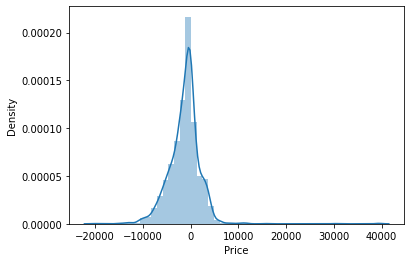

In [158]:
import seaborn as sns
sns.distplot(y_test-y_pred)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) 

In [166]:
r2score     = metrics.r2_score(y_test,predictions) 

In [170]:
data_test.drop(['Year' 'Dep_Part_of_day', 'Arrival_Part_of_day'], axis = 1,  inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [175]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2671 entries, 0 to 2670
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline              2671 non-null   int64  
 1   Source               2671 non-null   int64  
 2   Destination          2671 non-null   int64  
 3   Price                0 non-null      float64
 4   Date                 2671 non-null   int64  
 5   Month                2671 non-null   int64  
 6   day                  2671 non-null   int64  
 7   Stop                 2671 non-null   int64  
 8   Route_1              2671 non-null   int64  
 9   Route_2              2671 non-null   int64  
 10  Route_3              2671 non-null   int64  
 11  Route_4              2671 non-null   int64  
 12  Route_5              2671 non-null   int64  
 13  Arrival_hour         2671 non-null   int64  
 14  Arrival_min          2671 non-null   int64  
 15  Dep_hour             2671 non-null   i

In [173]:
X_train.columns

Index(['Airline', 'Source', 'Destination', 'Date', 'Month', 'day', 'Stop',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5', 'Arrival_hour',
       'Arrival_min', 'Dep_hour', 'Dep_min', 'Duration_mins',
       'Dep_Part_of_day', 'Arrival_Part_of_day'],
      dtype='object')

In [184]:
y_pred_oroginal = rf_random.predict(data_test.drop(['Price'], axis = 1))

In [ ]:
y_test_origin = data_test['Price'].fillna(data['Price'].mean(), inplace = True)

In [187]:
y_pred_oroginal

array([11722.16219348,  7158.76262812, 14311.9072337 , ...,
       15633.5633274 , 14031.43378754,  8208.02901473])

In [188]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(y_pred_oroginal)
sub_df=pd.read_excel('/content/drive/MyDrive/Flight-Price-Prediction/Sample_submission.xlsx')
datasets=pd.concat([pred],axis=1)
datasets.columns=['Price']
datasets.to_excel('/content/drive/MyDrive/Flight-Price-Prediction/Sample_submission.xlsx',index=False)